In [2]:
import numpy as np
from math import sqrt

In [196]:
channel_1 = np.array([[1.4,3.1,1.3],
                      [2.4,2.22,2.9],
                      [2,3,4]
                     ])
resolutions  = [0.1, 0.1, 0.07]

                     
channel_2 = np.array([[1.1,1.1,1.1],
                      [2.1,2.1,1.1],
                      [3.1,3.1,1.1],
                      [11,1,1]
                     ])

channel_1 = np.arange(300).reshape((100,3))
channel_2 = np.arange(300).reshape((100,3))

In [197]:
channel_1_t = channel_1.transpose()

In [198]:
channel_1_t = channel_1.transpose()
a_t_minus_b = channel_1_t-channel_2[:,:, np.newaxis]

In [199]:
a_t_minus_b.size

30000

In [200]:
def find_distances(channel_1, channel_2):
    channel_1_t = channel_1.transpose()
    a_t_minus_b = channel_1_t-channel_2[:,:, np.newaxis]
    T = np.tensordot(a_t_minus_b,a_t_minus_b, axes=((1),(1)))
    T=T**0.5
    return T

In [201]:
import time
start = time.time()
T = find_distances(channel_1, channel_2)
end = time.time()
print(end-start)

4.895294904708862


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in power
  """


In [179]:

T[0][2][0][2]

3.581898937714463

In [163]:
T.shape

(4, 3, 4, 3)

In [206]:
def get_distance(a,b):
    distance = sqrt(pow((a[0]-b[0]),2)+
                    pow((a[1]-b[1]),2)+
                    pow((a[2]-b[2]),2))
    return distance

In [207]:
start = time.time()
for a in channel_1:
    for b in channel_2:
        k = get_distance(a,b)
end = time.time()
print(end-start)

0.029314756393432617


In [217]:
A = np.array([[1,2,3],
             [2,3,4]])
B = np.array([[1,2,3],
             [3,4,5],
             [3,3,3],
             [2,3,4]])
A_T = A.transpose()

difference = A_T - B[:,:, np.newaxis]


In [273]:
difference

array([[[ 0,  1],
        [ 0,  1],
        [ 0,  1]],

       [[-2, -1],
        [-2, -1],
        [-2, -1]],

       [[-2, -1],
        [-1,  0],
        [ 0,  1]],

       [[-1,  0],
        [-1,  0],
        [-1,  0]]])

In [274]:
d_t = difference.transpose()


d_shaped = d_t.flatten("C").reshape((2,3,4))
d_shaped

array([[[ 0, -2, -2, -1],
        [ 0, -2, -1, -1],
        [ 0, -2,  0, -1]],

       [[ 1, -1, -1,  0],
        [ 1, -1,  0,  0],
        [ 1, -1,  1,  0]]])

In [285]:
d_shaped[0]*d_shaped[0]


array([[0, 4, 4, 1],
       [0, 4, 1, 1],
       [0, 4, 0, 1]])

In [301]:
d_0 = np.tensordot(d_shaped[0], d_shaped[0], axes=([0],[0]))
d_0

array([[ 0,  0,  0,  0],
       [ 0, 12,  6,  6],
       [ 0,  6,  5,  3],
       [ 0,  6,  3,  3]])

In [295]:
a = np.tensordot(d_0, np.identity(4), axes=([0],[0]))

In [297]:
np.diag(a)

array([ 0., 12.,  5.,  3.])

In [1]:
def get_distances(channel_1, channel_2):
    n = len(channel_1)
    m = len(channel_2)
   
    difference = channel_1.transpose()- channel_2[:,:, np.newaxis]
    difference_reshape = difference.transpose().flatten("C").reshape((n,3,m))
    

In [17]:
from skimage import io, measure
from skimage.filters import threshold_otsu

In [26]:
image = np.array(io.imread("../test_data/042-stack1-PSD.tif", "pil"))

In [27]:
threshold = threshold_otsu(image)


In [28]:
binary = image > threshold

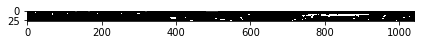

In [29]:
io.imshow(binary)

In [31]:
import matplotlib.pyplot as plt


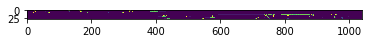

In [33]:
plt.imshow(image)

In [35]:
labels = measure.label(image, connectivity=1)

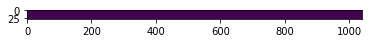

In [37]:
plt.imshow(labels)